# AI/ML Attacks

## Perturbation
It is a technique of input modification in such a way so that original input retains the semantics but fools the AI/ML model prediction 

## Image Perturbation
In this notebook we will create a Image classifier and later try to perturb (modify) an input image by adding some noise without changing much of its appearnce and fool the classifier to perform incorrect prediction. The technique will be used is FGSM. For more detail on FGSM here is the link to the paper https://arxiv.org/abs/1412.6572 

### Create a DNN to predict MNIST numbers
1. Load MNIST number images DS
2. Test/Train
3. Create a DNN 
4. Train accuracy & Test accuracy

In [ ]:
#import MNIST DS
from tensorflow import keras
from tensorflow.keras import datasets
from matplotlib import pyplot as plt

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()
X_train.shape, X_test.shape

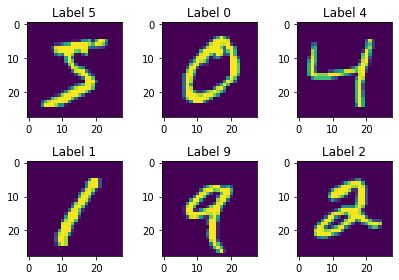

In [ ]:
#dataset sample display
i=0
while i<6 :
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i])
  plt.title("Label "+str(y_train[i]))
  plt.tight_layout()
  i=i+1


In [ ]:
#normalize as RGB max val is 255
X_train = X_train/255
X_test = X_test/255

In [ ]:
#create a DNN
from keras import Sequential, layers
X_train[0].shape #input shape

(28, 28)

In [ ]:
#build model architecture
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(3000, activation='relu'))
model.add(keras.layers.Dense(3000, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # output that is why 10

In [ ]:
model.compile(optimizer='SGD', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 140s 74ms/step - loss: 0.5161 - accuracy: 0.8747
Epoch 2/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.2569 - accuracy: 0.9271
Epoch 3/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.2068 - accuracy: 0.9417
Epoch 4/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.1739 - accuracy: 0.9508
Epoch 5/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1496 - accuracy: 0.9579


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')
# !ls /content/gdrive/MyDrive/AI-ML_Attack/

#model.save("/content/gdrive/MyDrive/AI-ML_Attack/ciphar.h5")

In [ ]:
# # load and evaluate a saved model
# from keras.models import load_model
 
# # load model
# model = load_model('/content/gdrive/MyDrive/AI-ML_Attack/ciphar.h5')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss = ",loss,"\n","accuracy = ",accuracy)

313/313 [==============================] - 7s 21ms/step - loss: 0.1427 - accuracy: 0.9588

Loss =  0.1426878124475479 
 accuracy =  0.9588000178337097


In [ ]:
y_predicted = model.predict(X_test)
# y_predicted holds all the y_train predictions
y_predicted[0] # first one

array([9.38920493e-05, 6.99293253e-07, 8.23632639e-04, 2.82462733e-03,
       7.19991476e-07, 5.39168468e-05, 1.15630900e-08, 9.95934367e-01,
       1.41913515e-05, 2.53985287e-04], dtype=float32)

Number predicted is ==>  7


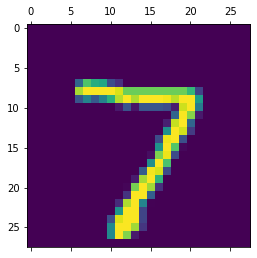

In [ ]:
# take a input image X_test[0] and print image along with prediction
import numpy as np
plt.matshow(X_test[0])
print("Image Number predicted is ==> ", np.argmax(y_predicted[0]))

In [ ]:
# a blank test image
#blank_img = np.zeros([28,28])
ones_img = np.ones([28,28],dtype=np.uint8)
randon_img = np.random.random([28,28])
ones_img.shape, randon_img.shape

((28, 28), (28, 28))

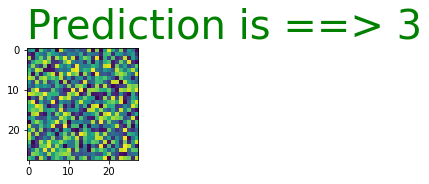

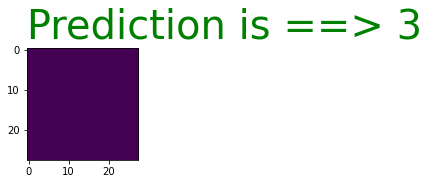

In [ ]:
images = [randon_img,ones_img]
for item in images:
  plt.figure(figsize=(2,3))
  plt.title("Prediction is ==> "+str(np.argmax(model.predict(item.reshape(1,28,28)))),fontsize=40, color="green", loc='left',pad=10)
  plt.imshow(item)

In [ ]:
x1 = randon_img.reshape(1,28,28)
print("randon_img prediction is ==> ",np.argmax(model.predict(x1)))
x2 = ones_img.reshape(1,28,28)
print("one_img prediction is ==> ",np.argmax(model.predict(x2)))

randon_img prediction is ==>  3
one_img prediction is ==>  3


### Applying FGSM  - Fast gradient sign method

###      new_adv_image = original_image + ϵ  *  Sign ($∇_{x}$J(θ,x,y))

ϵ = just a small number to scale up and down e.g 0.1
J(θ,x,y) = Loss function, in which theta represnts parameters, x represnts input to the model & y is output (label)

$∇_{x}$ = represnt the gradient of the above cost function. And Sign we take to limit it to matrix of range (-1,1)


probs ==>  tf.Tensor(
[9.38920493e-05 6.99293253e-07 8.23633047e-04 2.82463152e-03
 7.19990737e-07 5.39168468e-05 1.15631122e-08 9.95934367e-01
 1.41913515e-05 2.53985287e-04], shape=(10,), dtype=float32)

Number predicted by AI/ML is ==>  7


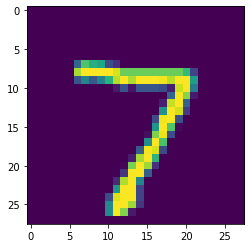

In [ ]:
#lets take one example of test dataset
plt.ti
plt.imshow(X_test[0])
y_predicted = model(X_test)
print("probs ==> ",y_predicted[0])
print("\nNumber predicted by AI/ML is ==> ", np.argmax(y_predicted[0]))

In [ ]:
def adversarial_pattern(image, label):#, model):
    image = tensorflow.cast(image, tensorflow.float32)
    # print(type(image))
    
    with tensorflow.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tensorflow.keras.losses.sparse_categorical_crossentropy(label, prediction)
    
    gradient = tape.gradient(loss, image)
    signed_grad = tensorflow.sign(gradient)
    return signed_grad
    

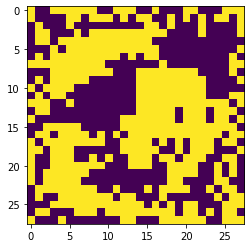

In [ ]:
import tensorflow
#perturb corresponding label
label = y_train[0]

#creating perturb noise
perturbations = adversarial_pattern(X_train[0].reshape((1, 28, 28)), label).numpy()

#display the noise       
plt.imshow(perturbations[0]);

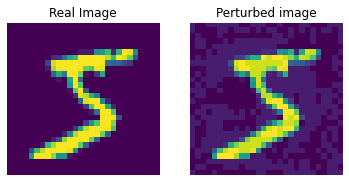

In [ ]:
#Now , add the above noise to actual image (labelled one)
label = y_train[0]
image = X_train[0]

# small number to scale up and down
epsilon = 0.04

# adversarial image as per FGSM method
adversarial = image + perturbations * epsilon

#plt.imshow(adversarial[0])
fig = plt.figure()
img1 = fig.add_subplot(1,2,1)
plt.title("Real Image")
img1.imshow(image)
plt.axis('off')

img2 = fig.add_subplot(1,2,2)
plt.title("Perturbed image")
img2.imshow(adversarial[0])
plt.axis('off')

plt.show()


Confidence for 5: 0.28507337
Confidence for 3: 0.7088019


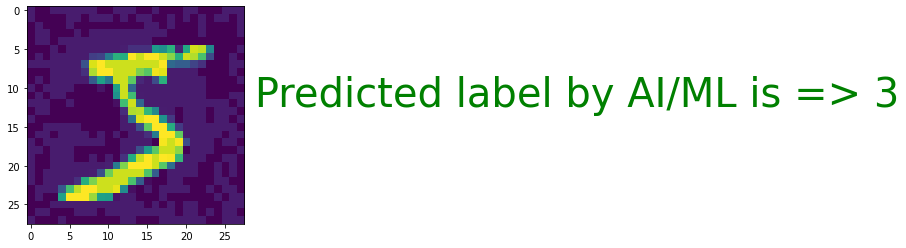

In [ ]:
probs = model.predict(adversarial[0].reshape(1,28,28))
print('Confidence for 5:', np.max(probs[:, 5]))
print('Confidence for 3:', np.max(probs[:, 3]))
plt.ylabel('Predicted label by AI/ML is => '+str(np.argmax(model.predict(adversarial[0].reshape(1,28,28)))), labelpad=-570, fontsize=40, rotation=0, color="green")
#plt.axis('off')
plt.imshow(adversarial[0]);

#=================================